13 La curva de encendido de televisores en la ciudad de San Salvador está en función de la hora del
día y del día de la semana.
Suponga que en un intervalo de 4 horas, un determinado día, el porcentaje de televisores
encendidos está dado por la función

$$ P(x) = \frac{1}{2.5} \left( -10 sen\left( \frac{12x}{7} \right) e^{\frac{-24x}{7} } + \frac{48}{7} x e^{ \frac{-8x}{7}}  + 0.8  \right) $$

En donde: 
x: Tiempo en horas, en el intervalo: 0<=x<=4
p: porcentaje en horas de televisores encendidos

Emplee el método de Newton-Raphson para encontrar el máximo de la función con una
precisión de 10-12. Emplee 15 decimales.

Primero Operamos el factor fuera del paréntesis:

$$ P(x) =  -4 sen\left( \frac{12x}{7} \right) e^{\frac{-24x}{7} } + \frac{96x}{35} e^{ \frac{-8x}{7}}  + \frac{8}{25}  $$

Luego derivamos toda la función y tenemos:
$$ P'(x) = \frac{96}{7} sen \left( \frac{12x}{7} \right) e^{ \frac{-24x}{7}} - \frac{48}{7} cos \left( \frac{12x}{7} \right) e^{ \frac{-24x}{7} } + \frac{96}{35} e^{ \frac{-8x}{7}} - \frac{768}{245} x e^{ \frac{-8x}{7} } $$

Y ya que buscamos un máximo necesitamos la segunda derivada:
$$  \frac{2304}{49} cos \left( \frac{12x}{7} \right)  e^{-\frac{24x}{7}} - \frac{1728}{49} sen \left( \frac{12x}{7} \right) e^{-\frac{24x}{7} } + \frac{6144}{1715}  x e^{-\frac{8x}{7}} - \frac{1536}{245}e^{-\frac{8x}{7}} $$

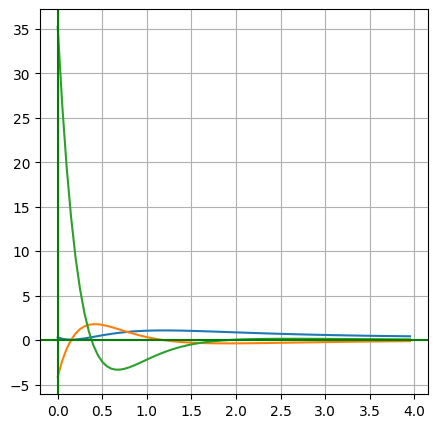

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ # de iteración ┃ x0                ┃ x1                ┃ error             ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 1              │ 1.250000000000000 │ 1.187288181107185 │ 0.062711818892815 │
│ 2              │ 1.187288181107185 │ 1.194296209690190 │ 0.007008028583005 │
│ 3              │ 1.194296209690190 │ 1.194146610774405 │ 0.000149598915785 │
│ 4              │ 1.194146610774405 │ 1.194151314596844 │ <-- solución      │
└────────────────┴───────────────────┴───────────────────┴───────────────────┘

In [27]:
import numpy

from math import sin, cos, e
from matplotlib import pyplot

from metodos_numericos import newton_raphson
from utils import imprimir_tabla


def funcion_tiempo_televisores(x):
    return round(
        (-4 * sin((12 * x) / 7) * e**((-24 * x) / 7))
        + (((96 * x) / 35) * e**((-8 * x) / 7))
        + (8/25),
        15
    )

def derivada_tiempo_televisores(x):
    return round(
        ((96/7) * sin((12*x)/7) * e**((-24*x)/7))
        - ((48/7) * cos((12*x)/7) * e**((-24*x)/7))
        + ((96/ 35) * e**((-8 * x) / 7))
        - (((768 * x) / 245) * e**((-8 * x) / 7))
        ,
        15
    )

def segunda_derivada_de_televisores(x):
    return round(
        (
            ((2034/49) * cos((12*x) / 7) * e**((-24*x)/7))
            - ((1728/49) * sin((12*x) / 7 ) * e**((-24*x)/7))
            + ((6144/1715) * x * e**((-8*x)/7))
            - ((1536/245) * e**((-8*x)/7))
        ),
        15
    )

# graficamos la función para ver en que intervalo podemos tener  un resultado
eje_x = [x for x in numpy.arange(0, 4, 0.05)]
eje_y = [funcion_tiempo_televisores(x) for x in eje_x]

eje_y_derivada = [derivada_tiempo_televisores(x) for x in eje_x]
eje_y_segunda_derivada = [segunda_derivada_de_televisores(x) for x in eje_x]

plot_carga_en_tiempo = pyplot.figure(figsize=(5,5),) 
pyplot.plot(eje_x, eje_y)
pyplot.plot(eje_x, eje_y_derivada)
pyplot.plot(eje_x, eje_y_segunda_derivada)
pyplot.grid(visible=True)
pyplot.axvline(0, color="g")
pyplot.axhline(0, color="g")
pyplot.show()

# observamos que el resultado puede estar muy cerca de 1.25, así que
# lo tomamos como x0

resultado = newton_raphson(1.25, derivada_tiempo_televisores, segunda_derivada_de_televisores, resultado=[])
imprimir_tabla(resultado)